In [8]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_score

In [9]:
# Generate synthetic data

X,y = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

In [10]:
# Apply K-Means Clustering

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

y_pred = kmeans.fit_predict(X)

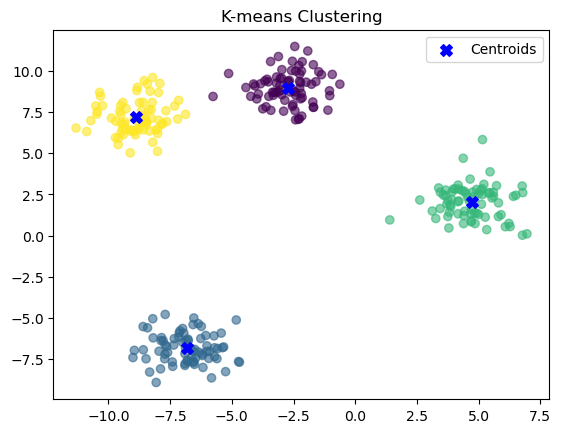

In [11]:
# Plot results

plt.scatter(X[:,0],X[:,1], c=y_pred, cmap='viridis', alpha=0.6)

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=70, marker='X', c='blue', label='Centroids')

plt.title('K-means Clustering')

plt.legend()

plt.show()


1️⃣ Elbow Method

Concept
The Elbow Method helps find the best K by plotting the inertia (WCSS) vs. number of clusters.
WCSS (Within-Cluster Sum of Squares): Measures how well the clusters are formed.
We choose the K where the WCSS stops decreasing sharply (elbow point).


In [12]:
wcss = []

K_range = range(1, 11)  # Trying different K values from 1 to 10

for k in K_range:

    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)

    kmeans.fit(X)

    wcss.append(kmeans.inertia_) # Store WCSS for each K

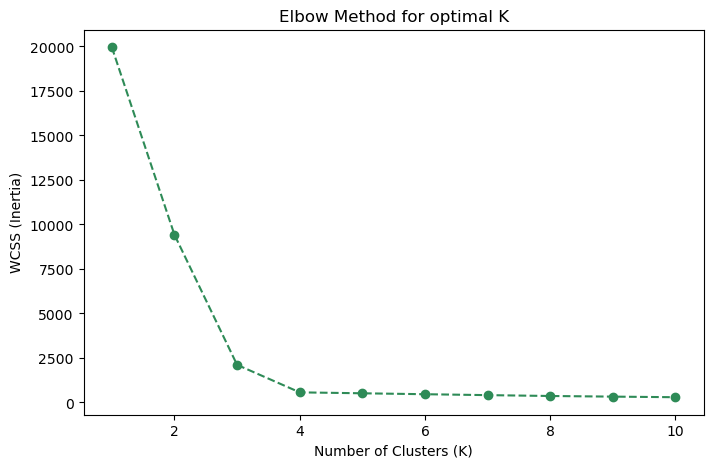

In [13]:
# Plot Elbow Curve

plt.figure(figsize=(8,5))

plt.plot(K_range,wcss,marker='o', linestyle='--', color='seagreen')

plt.xlabel("Number of Clusters (K)")

plt.ylabel("WCSS (Inertia)")

plt.title("Elbow Method for optimal K")

plt.show()

2️⃣ Silhouette Score

Concept
The Silhouette Score measures how well-separated the clusters are.
Score range:
+1 → Well-clustered
0 → Overlapping clusters
-1 → Wrong clustering

In [14]:
silhouette_scores = []

for k in range(2,11): # Silhouette is not defined for K=1

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    labels = kmeans.fit_predict(X)

    score = silhouette_score(X,labels)

    silhouette_scores.append(score)

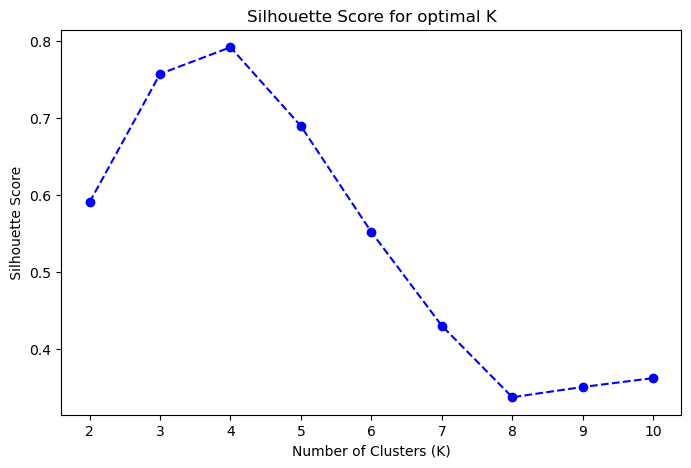

In [15]:
# Plot Silhouette Score

plt.figure(figsize=(8,5))

plt.plot(range(2,11),silhouette_scores,marker='o', linestyle='--', color='blue')

plt.xlabel("Number of Clusters (K)")

plt.ylabel(" Silhouette Score ")

plt.title("Silhouette Score for optimal K")

plt.show()


Peak value of silhouette score → Best choice for K.
Compare with the Elbow Method for confirmation.